c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/


Field distribution:
field
Not Recommended                          200
Information Technology                    51
Quantity Surveying                        24
Irrigation and Drainage Technology        23
Electrical Technology                     18
Crop Production                           16
Highway Technology                        12
Geomatics Technology                      12
Horticulture Technology                   12
Animal Health                              9
Manufacturing Technology                   8
Electronic and Telecommunication           6
Agricultural Mechanization Technology      6
Water and Sanitation Technology            2
Automobile Technology                      1
Name: count, dtype: int64

Rare fields (will be removed): ['Automobile Technology']
Removed 1 rare field categories
Data split with stratification

Training set shape: (319, 128)
Test set shape: (80, 128)
Number of classes: 14
Classes: ['Agricultural Mechanization Technology' 'Animal Health' 'Crop

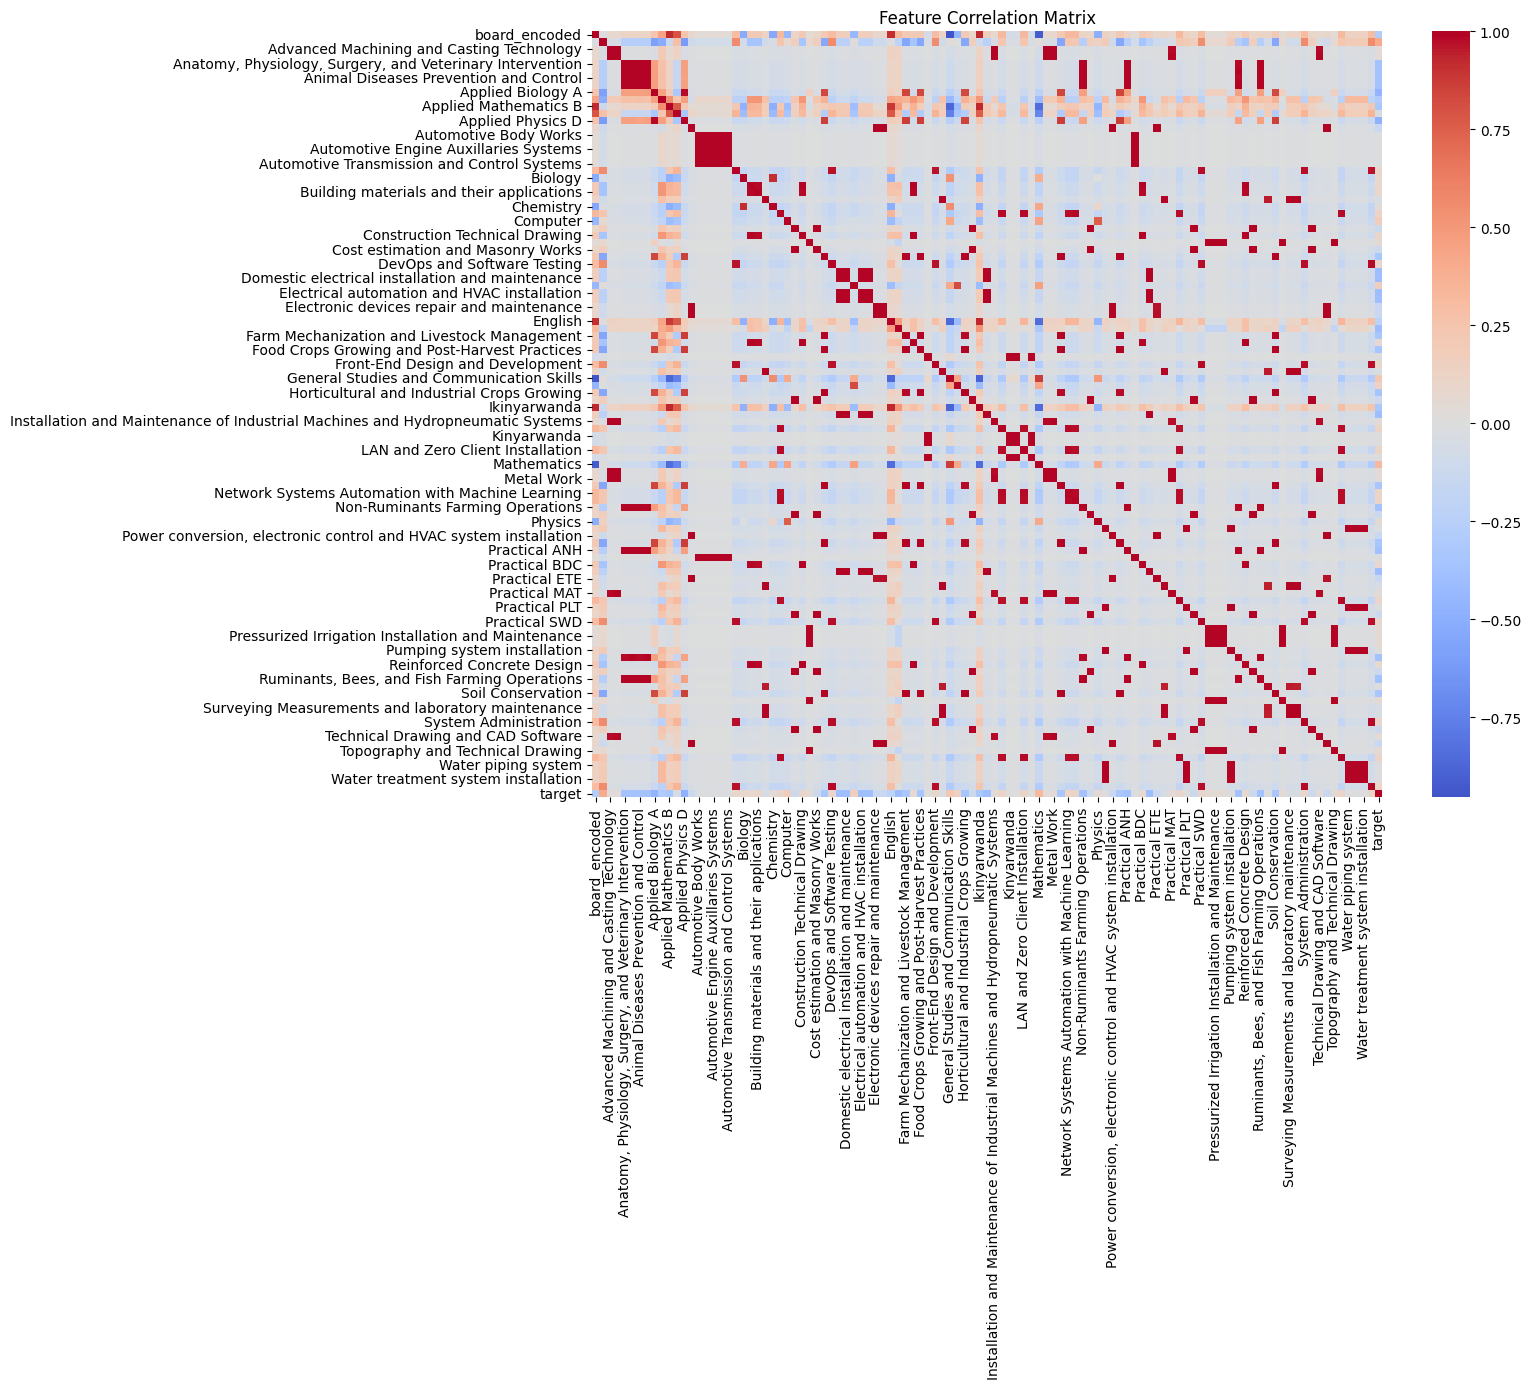


Training the Neural Network model with class weights...
Epoch 1/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0658 - loss: 3.7056 - val_accuracy: 0.0500 - val_loss: 2.8822 - learning_rate: 5.0000e-04
Epoch 2/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1003 - loss: 3.3854 - val_accuracy: 0.1625 - val_loss: 2.8411 - learning_rate: 5.0000e-04
Epoch 3/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0878 - loss: 3.1779 - val_accuracy: 0.2000 - val_loss: 2.7956 - learning_rate: 5.0000e-04
Epoch 4/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1348 - loss: 2.8316 - val_accuracy: 0.3000 - val_loss: 2.7175 - learning_rate: 5.0000e-04
Epoch 5/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1599 - loss: 2.5317 - val_accuracy: 0.3500 - val_loss: 2.6220 - learning_rate: 5.0000e-04
Epoch 6/300
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1975 - loss: 2.3345 - val_accuracy: 0.3750 - val_loss: 2.5261 - learning_rate: 5.0000e-04
Epoch 7/300


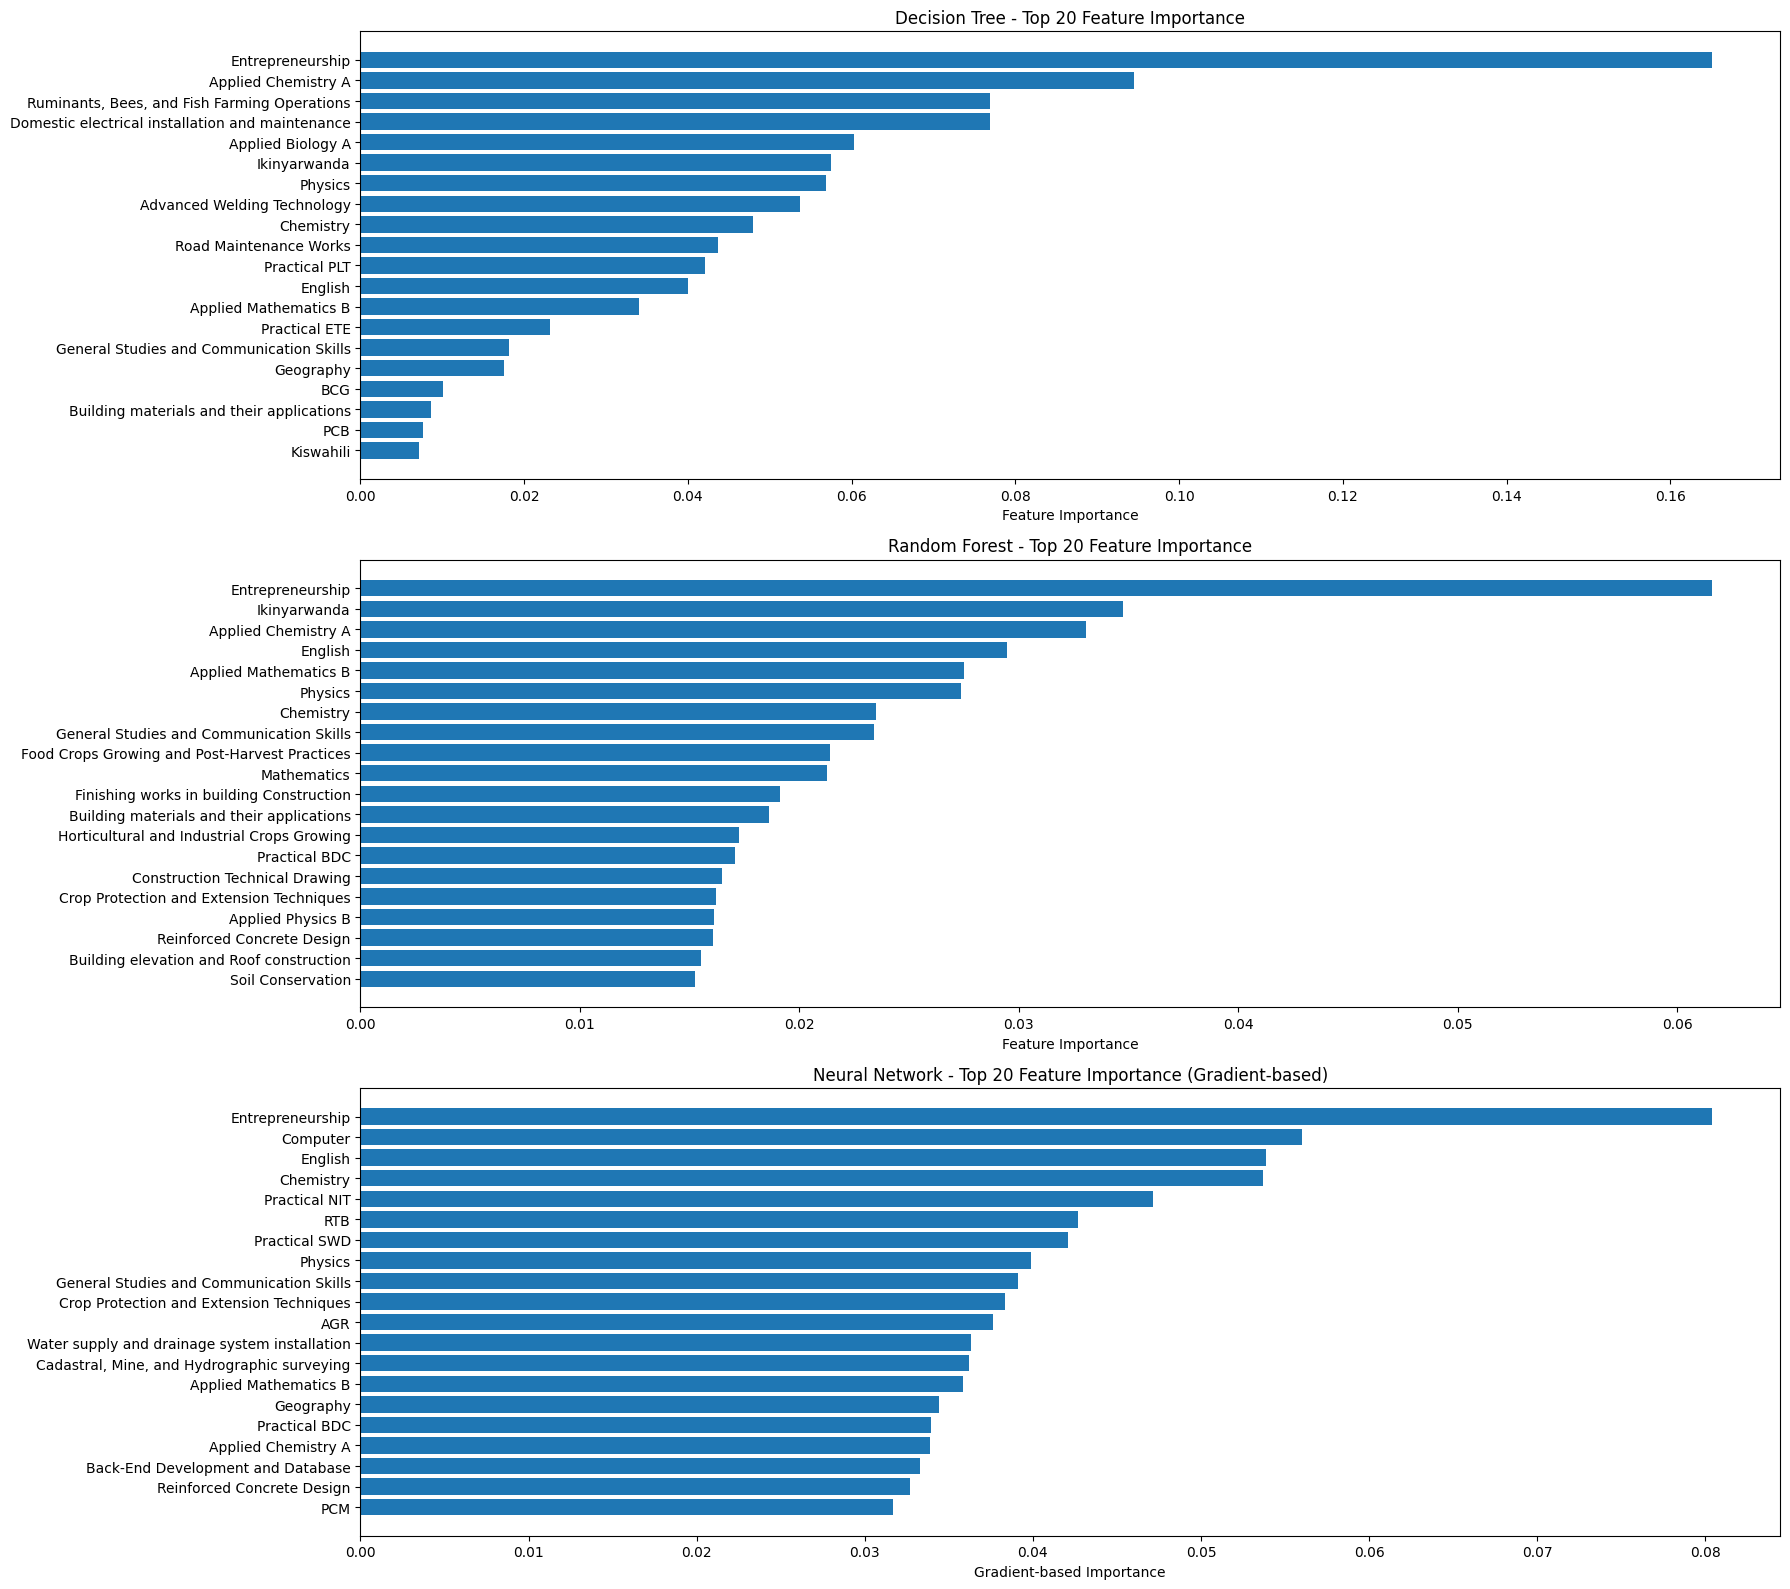

Classes in test set: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
All classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Missing classes in test: {np.int64(13)}
Present class names: ['Agricultural Mechanization Technology' 'Animal Health' 'Crop Production'
 'Electrical Technology' 'Electronic and Telecommunication'
 'Geomatics Technology' 'Highway Technology' 'Horticulture Technology'
 'Information Technology' 'Irrigation and Drainage Technology'
 'Manufacturing Technology' 'Not Recommended' 'Quantity Surveying']

Classification Report for Neural Network:
                                       precision    recall  f1-score   support

Agricultural Mechanization Technology       0.00      0.00      0.00         1
                        Animal Health       1.00      1.00      1.00         2
                      Crop Production       1.00      1.00      1.00         3
                Electrical Technology       1.00      1.00      1.00         4
     Electronic and Telecommunication       

Examination Board: REB
Combination: MCB
Predicted Field: Manufacturing Technology
Confidence: 0.5305
Method: neural_network
Top Subjects: ['Entrepreneurship', 'Biology', 'General Studies and Communication Skills', 'Chemistry', 'Mathematics']

Best model (Neural Network) and preprocessing objects saved for future use.


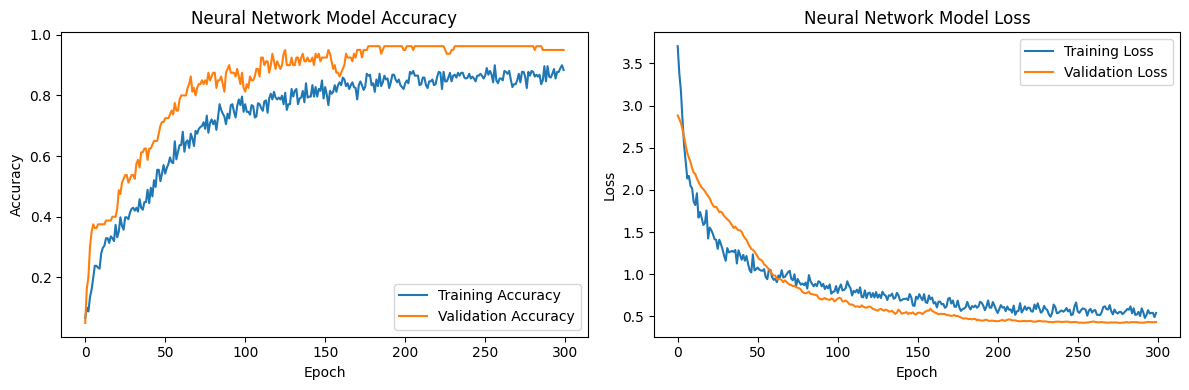

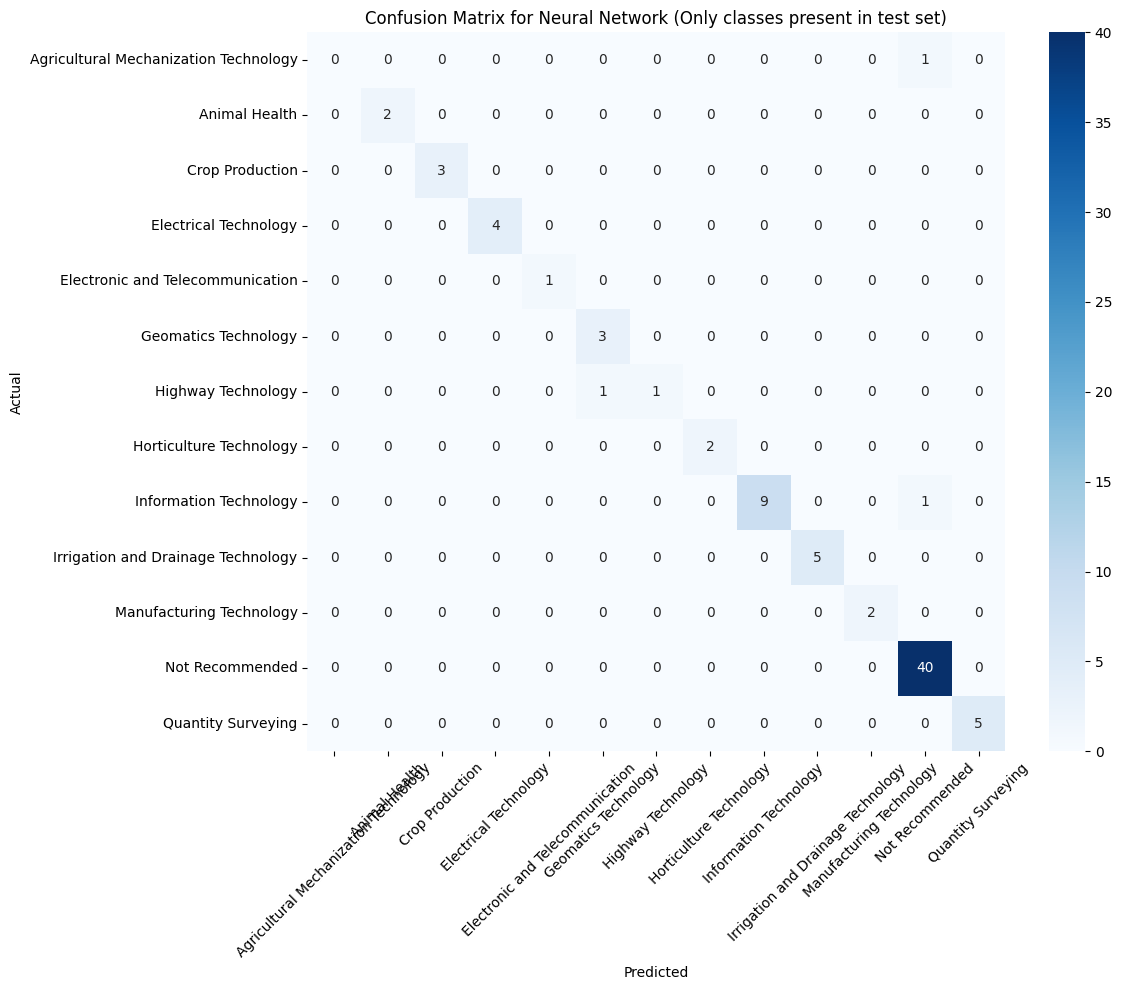


Model Performance Analysis:
Accuracy gap (train - test): -0.0283
Loss gap (test - train): 0.0769
Diagnosis: Model shows SOME OVERFITTING
Recommendation: Consider slight regularization

Per-class accuracy for Neural Network:
  Agricultural Mechanization Technology: 0.000 (1 samples)
  Animal Health: 1.000 (2 samples)
  Crop Production: 1.000 (3 samples)
  Electrical Technology: 1.000 (4 samples)
  Electronic and Telecommunication: 1.000 (1 samples)
  Geomatics Technology: 1.000 (3 samples)
  Highway Technology: 0.500 (2 samples)
  Horticulture Technology: 1.000 (2 samples)
  Information Technology: 0.900 (10 samples)
  Irrigation and Drainage Technology: 1.000 (5 samples)
  Manufacturing Technology: 1.000 (2 samples)
  Not Recommended: 1.000 (40 samples)
  Quantity Surveying: 1.000 (5 samples)

Examination Board Distribution in Dataset:
examinationBoard
RTB    250
REB    149
Name: count, dtype: int64


In [1]:
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
with open('dataset/rp_merged_dataset_cleaned_marks_to_80_where_was_1.json', 'r') as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

# Replace "Synthetic Course" with "Not Recommended"
df['field'] = df['field'].replace('Synthetic Course', 'Not Recommended')

# Extract marks into separate columns
def extract_marks(row):
    marks = row['marks']
    if isinstance(marks, dict):
        return pd.Series(marks)
    return pd.Series()

marks_df = df.apply(extract_marks, axis=1)

# Create a new DataFrame to avoid fragmentation issues
processed_df = pd.concat([df[['examinationBoard', 'combination', 'field']], marks_df], axis=1)

# Identify all subject columns
subject_columns = [col for col in processed_df.columns if col not in ['examinationBoard', 'combination', 'field']]

# Fill missing marks with 0 (for subjects not taken in a combination)
processed_df[subject_columns] = processed_df[subject_columns].fillna(0)

# Check field distribution and handle rare classes
field_counts = processed_df['field'].value_counts()
print("\nField distribution:")
print(field_counts)

# Identify fields with only 1 sample
rare_fields = field_counts[field_counts < 2].index.tolist()
print(f"\nRare fields (will be removed): {rare_fields}")

# Remove rows with rare fields
if rare_fields:
    processed_df = processed_df[~processed_df['field'].isin(rare_fields)]
    print(f"Removed {len(rare_fields)} rare field categories")

# Encode categorical variables
board_encoder = LabelEncoder()
combination_encoder = LabelEncoder()
field_encoder = LabelEncoder()

# Create a copy to avoid fragmentation warnings
df_encoded = processed_df.copy()
df_encoded['board_encoded'] = board_encoder.fit_transform(processed_df['examinationBoard'])
df_encoded['combination_encoded'] = combination_encoder.fit_transform(processed_df['combination'])
df_encoded['field_encoded'] = field_encoder.fit_transform(processed_df['field'])

# Prepare features and target - using board, combination, and subject scores
X_board = df_encoded[['board_encoded']]
X_combination = df_encoded[['combination_encoded']]
X_subjects = df_encoded[subject_columns]
X_combined = pd.concat([X_board, X_combination, X_subjects], axis=1)

y = df_encoded['field_encoded']

# Check if we can stratify
if len(np.unique(y)) > 1 and np.min(np.bincount(y)) >= 2:
    X_train, X_test, y_train, y_test = train_test_split(
        X_combined, y, test_size=0.2, random_state=42, stratify=y
    )
    print("Data split with stratification")
else:
    X_train, X_test, y_train, y_test = train_test_split(
        X_combined, y, test_size=0.2, random_state=42
    )
    print("Warning: Could not stratify due to class distribution")

# Separate board, combination, and subject features
X_train_board = X_train[['board_encoded']]
X_train_comb = X_train[['combination_encoded']]
X_train_subj = X_train[subject_columns]
X_test_board = X_test[['board_encoded']]
X_test_comb = X_test[['combination_encoded']]
X_test_subj = X_test[subject_columns]

# Scale the subject features
subject_scaler = StandardScaler()
X_train_subj_scaled = subject_scaler.fit_transform(X_train_subj)
X_test_subj_scaled = subject_scaler.transform(X_test_subj)

# One-hot encode the board and combination features
board_ohe = OneHotEncoder(sparse_output=False)
combination_ohe = OneHotEncoder(sparse_output=False)

X_train_board_ohe = board_ohe.fit_transform(X_train_board)
X_train_comb_ohe = combination_ohe.fit_transform(X_train_comb)
X_test_board_ohe = board_ohe.transform(X_test_board)
X_test_comb_ohe = combination_ohe.transform(X_test_comb)

# Combine all features
X_train_combined = np.concatenate([X_train_board_ohe, X_train_comb_ohe, X_train_subj_scaled], axis=1)
X_test_combined = np.concatenate([X_test_board_ohe, X_test_comb_ohe, X_test_subj_scaled], axis=1)

print(f"\nTraining set shape: {X_train_combined.shape}")
print(f"Test set shape: {X_test_combined.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Classes: {field_encoder.classes_}")

# Check class distribution in train and test
print("\nClass distribution in training set:")
train_counts = pd.Series(y_train).value_counts().sort_index()
for class_idx, count in train_counts.items():
    class_name = field_encoder.inverse_transform([class_idx])[0]
    print(f"  {class_name}: {count} samples")

print("\nClass distribution in test set:")
test_counts = pd.Series(y_test).value_counts().sort_index()
for class_idx, count in test_counts.items():
    class_name = field_encoder.inverse_transform([class_idx])[0]
    print(f"  {class_name}: {count} samples")

# Handle class imbalance with custom class weights
print("\nCalculating class weights to handle imbalance...")
class_counts = np.bincount(y_train)
total_samples = len(y_train)
class_weights = {}

for class_idx in range(len(class_counts)):
    if class_counts[class_idx] > 0:
        # Higher weight for minority classes
        class_weights[class_idx] = total_samples / (len(class_counts) * class_counts[class_idx])
    else:
        class_weights[class_idx] = 1.0

print("Class weights:", class_weights)

# Plot correlation matrix
plt.figure(figsize=(16, 14))
correlation_matrix = pd.concat([X_combined, y.rename('target')], axis=1).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Create and train the neural network model
def create_model(input_dim, num_classes):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_dim,), kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        
        layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0005),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Create and train the neural network model
input_dim = X_train_combined.shape[1]
num_classes = len(np.unique(y))

nn_model = create_model(input_dim, num_classes)

# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=30,
    restore_best_weights=True,
    min_delta=0.001
)

# Reduce learning rate on plateau
reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=0.0001
)

# Train the model with class weights
print("\nTraining the Neural Network model with class weights...")
nn_history = nn_model.fit(
    X_train_combined, y_train,
    validation_data=(X_test_combined, y_test),
    epochs=300,
    batch_size=16,
    class_weight=class_weights,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate the neural network model
nn_train_loss, nn_train_accuracy = nn_model.evaluate(X_train_combined, y_train, verbose=0)
nn_test_loss, nn_test_accuracy = nn_model.evaluate(X_test_combined, y_test, verbose=0)

print(f"\nNeural Network Training Accuracy: {nn_train_accuracy:.4f}")
print(f"Neural Network Test Accuracy: {nn_test_accuracy:.4f}")

# Make predictions with neural network
nn_y_pred = nn_model.predict(X_test_combined)
nn_y_pred_classes = np.argmax(nn_y_pred, axis=1)

# Train and evaluate Decision Tree
print("\nTraining Decision Tree model...")
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train_combined, y_train)

dt_train_pred = dt_model.predict(X_train_combined)
dt_test_pred = dt_model.predict(X_test_combined)

dt_train_accuracy = accuracy_score(y_train, dt_train_pred)
dt_test_accuracy = accuracy_score(y_test, dt_test_pred)

print(f"Decision Tree Training Accuracy: {dt_train_accuracy:.4f}")
print(f"Decision Tree Test Accuracy: {dt_test_accuracy:.4f}")

# Train and evaluate Random Forest
print("\nTraining Random Forest model...")
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)
rf_model.fit(X_train_combined, y_train)

rf_train_pred = rf_model.predict(X_train_combined)
rf_test_pred = rf_model.predict(X_test_combined)

rf_train_accuracy = accuracy_score(y_train, rf_train_pred)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)

print(f"Random Forest Training Accuracy: {rf_train_accuracy:.4f}")
print(f"Random Forest Test Accuracy: {rf_test_accuracy:.4f}")

# Compare model performance
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)
print(f"Neural Network - Test Accuracy: {nn_test_accuracy:.4f}")
print(f"Decision Tree - Test Accuracy: {dt_test_accuracy:.4f}")
print(f"Random Forest - Test Accuracy: {rf_test_accuracy:.4f}")

# Determine the best model
models = {
    'Neural Network': nn_test_accuracy,
    'Decision Tree': dt_test_accuracy,
    'Random Forest': rf_test_accuracy
}

best_model_name = max(models, key=models.get)
best_model_accuracy = models[best_model_name]

print(f"\nBest Model: {best_model_name} with test accuracy: {best_model_accuracy:.4f}")

# Plot feature importance for all models
feature_names = list(board_encoder.classes_) + list(combination_encoder.classes_) + subject_columns

plt.figure(figsize=(18, 16))

# Decision Tree feature importance
plt.subplot(3, 1, 1)
dt_importance = dt_model.feature_importances_
dt_indices = np.argsort(dt_importance)[::-1][:20]  # Top 20 features

plt.barh(range(len(dt_indices)), dt_importance[dt_indices], align='center')
plt.yticks(range(len(dt_indices)), [feature_names[i] for i in dt_indices])
plt.xlabel('Feature Importance')
plt.title('Decision Tree - Top 20 Feature Importance')
plt.gca().invert_yaxis()

# Random Forest feature importance
plt.subplot(3, 1, 2)
rf_importance = rf_model.feature_importances_
rf_indices = np.argsort(rf_importance)[::-1][:20]  # Top 20 features

plt.barh(range(len(rf_indices)), rf_importance[rf_indices], align='center')
plt.yticks(range(len(rf_indices)), [feature_names[i] for i in rf_indices])
plt.xlabel('Feature Importance')
plt.title('Random Forest - Top 20 Feature Importance')
plt.gca().invert_yaxis()

# Neural Network feature importance using gradient-based method
plt.subplot(3, 1, 3)

# Calculate gradient-based feature importance for neural network
def calculate_gradient_importance(model, X, y, num_classes):
    """Calculate feature importance using gradient-based method"""
    # Convert data to tensor
    X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)
    
    with tf.GradientTape() as tape:
        tape.watch(X_tensor)
        predictions = model(X_tensor)
        # Get predictions for true classes
        class_indices = tf.reshape(tf.convert_to_tensor(y, dtype=tf.int32), [-1])
        batch_range = tf.range(tf.shape(predictions)[0])
        indices = tf.stack([batch_range, class_indices], axis=1)
        true_class_predictions = tf.gather_nd(predictions, indices)
    
    # Calculate gradients of predictions with respect to inputs
    gradients = tape.gradient(true_class_predictions, X_tensor)
    
    # Average absolute gradients across samples
    importance = tf.reduce_mean(tf.abs(gradients), axis=0)
    
    return importance.numpy()

# Calculate gradient-based importance
nn_gradient_importance = calculate_gradient_importance(nn_model, X_test_combined, y_test, num_classes)
nn_indices = np.argsort(nn_gradient_importance)[::-1][:20]  # Top 20 features

plt.barh(range(len(nn_indices)), nn_gradient_importance[nn_indices], align='center')
plt.yticks(range(len(nn_indices)), [feature_names[i] for i in nn_indices])
plt.xlabel('Gradient-based Importance')
plt.title('Neural Network - Top 20 Feature Importance (Gradient-based)')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# Check which classes are present in test set vs all classes
unique_test_classes = np.unique(y_test)
unique_all_classes = np.arange(len(field_encoder.classes_))

print(f"Classes in test set: {unique_test_classes}")
print(f"All classes: {unique_all_classes}")
print(f"Missing classes in test: {set(unique_all_classes) - set(unique_test_classes)}")

# Get the actual class names present in test set
present_class_indices = sorted(np.unique(y_test))
present_class_names = field_encoder.inverse_transform(present_class_indices)

print(f"Present class names: {present_class_names}")

# Detailed classification report for the best model
print(f"\nClassification Report for {best_model_name}:")
if best_model_name == 'Neural Network':
    best_pred = nn_y_pred_classes
elif best_model_name == 'Decision Tree':
    best_pred = dt_test_pred
else:  # Random Forest
    best_pred = rf_test_pred

print(classification_report(y_test, best_pred, 
                           labels=present_class_indices,
                           target_names=present_class_names,
                           zero_division=0))

# Create a prediction function that uses board, combination, and subject scores
class FieldRecommendationSystem:
    def __init__(self, model, board_ohe, combination_ohe, subject_scaler, field_encoder, board_encoder, combination_encoder, subject_columns, model_type='neural_network'):
        self.model = model
        self.board_ohe = board_ohe
        self.combination_ohe = combination_ohe
        self.subject_scaler = subject_scaler
        self.field_encoder = field_encoder
        self.board_encoder = board_encoder
        self.combination_encoder = combination_encoder
        self.subject_columns = subject_columns
        self.model_type = model_type
    
    def predict(self, examination_board, combination, marks_dict):
        """
        Predict field based on examination board, combination, and subject scores
        
        Parameters:
        - examination_board: The examination board (REB or RTB)
        - combination: The student's combination (e.g., 'SWD', 'NIT')
        - marks_dict: Dictionary with subject names as keys and marks as values
        
        Returns:
        - Dictionary with prediction details and confidence
        """
        # Encode the examination board
        try:
            board_encoded = self.board_encoder.transform([examination_board])[0]
        except ValueError:
            # If board is unknown, use the most common one (REB)
            board_encoded = 0
        
        # One-hot encode the board
        board_ohe = self.board_ohe.transform([[board_encoded]])
        
        # Encode the combination
        try:
            combination_encoded = self.combination_encoder.transform([combination])[0]
        except ValueError:
            # If combination is unknown, use the most common one
            combination_encoded = 0
        
        # One-hot encode the combination
        combination_ohe = self.combination_ohe.transform([[combination_encoded]])
        
        # Create a feature vector from the marks
        subject_features = np.zeros(len(self.subject_columns))
        
        for subject, mark in marks_dict.items():
            if subject in self.subject_columns:
                idx = self.subject_columns.index(subject)
                subject_features[idx] = mark
        
        # Scale the subject features
        subject_features_scaled = self.subject_scaler.transform(subject_features.reshape(1, -1))
        
        # Combine all features
        combined_features = np.concatenate([board_ohe, combination_ohe, subject_features_scaled], axis=1)
        
        # Make prediction based on model type
        if self.model_type == 'neural_network':
            prediction = self.model.predict(combined_features, verbose=0)
            predicted_class = np.argmax(prediction)
            confidence = prediction[0][predicted_class]
        else:  # tree-based models
            prediction = self.model.predict_proba(combined_features)
            predicted_class = np.argmax(prediction)
            confidence = prediction[0][predicted_class]
        
        field_name = self.field_encoder.inverse_transform([predicted_class])[0]
        
        return {
            'predicted_field': field_name,
            'confidence': float(confidence),
            'method': self.model_type,
            'examination_board': examination_board,
            'combination': combination,
            'top_subjects': self.get_top_subjects(subject_features)
        }
    
    def get_top_subjects(self, features):
        """Get the subjects with the highest marks"""
        subject_scores = list(zip(self.subject_columns, features))
        subject_scores.sort(key=lambda x: x[1], reverse=True)
        return [subject for subject, score in subject_scores if score > 0][:5]

# Create the recommendation system with the best model
if best_model_name == 'Neural Network':
    best_model = nn_model
    model_type = 'neural_network'
elif best_model_name == 'Decision Tree':
    best_model = dt_model
    model_type = 'decision_tree'
else:  # Random Forest
    best_model = rf_model
    model_type = 'random_forest'

recommendation_system = FieldRecommendationSystem(
    model=best_model,
    board_ohe=board_ohe,
    combination_ohe=combination_ohe,
    subject_scaler=subject_scaler,
    field_encoder=field_encoder,
    board_encoder=board_encoder,
    combination_encoder=combination_encoder,
    subject_columns=subject_columns,
    model_type=model_type
)

# Test the system with example data
print("\n🧪 Testing Field Recommendation System")
print("=" * 70)

# Test with your specific example (REB board)
example_board = "RTB"
example_combination = "SWD"
example_marks = {
    "Applied Mathematics B": 85,
    "Front-End Design and Development": 92,
    "DevOps and Software Testing": 88,
    "Back-End Development and Database": 90,
    "Applied Physics B": 82,
    "System Administration": 85,
    "Entrepreneurship": 88,
    "Web3 Development and Machine Learning": 86,
    "English": 84,
    "Ikinyarwanda": 83,
    "Practical SWD": 95
}

result = recommendation_system.predict(example_board, example_combination, example_marks)

print(f"Examination Board: {result['examination_board']}")
print(f"Combination: {result['combination']}")
print(f"Predicted Field: {result['predicted_field']}")
print(f"Confidence: {result['confidence']:.4f}")
print(f"Method: {result['method']}")
print(f"Top Subjects: {result['top_subjects']}")

# Test with RTB board example
print("\n" + "-" * 40)
print("RTB Board Example:")
print("-" * 40)

example_board_2 = "RTB"
example_combination_2 = "BDC"
example_marks_2 = {
      "Applied Mathematics B":6,
      "Construction Technical Drawing":6,
      "Reinforced Concrete Design":6,
      "Building elevation and Roof construction":6,
      "Applied Physics B":80,
      "Building materials and their applications":80,
      "Finishing works in building Construction":6,
      "Ikinyarwanda":6,
      "English":6,
      "Applied Chemistry A":80,
      "Entrepreneurship":6,
      "Practical BDC":6
}

result_2 = recommendation_system.predict(example_board_2, example_combination_2, example_marks_2)

print(f"Examination Board: {result_2['examination_board']}")
print(f"Combination: {result_2['combination']}")
print(f"Predicted Field: {result_2['predicted_field']}")
print(f"Confidence: {result_2['confidence']:.4f}")
print(f"Method: {result_2['method']}")
print(f"Top Subjects: {result_2['top_subjects']}")

# Test with unknown board and combination
print("\n" + "-" * 40)
print("Test with RTB Board and Combination:")
print("-" * 40)

example_board_3 = "REB"
example_combination_3 = "MCB"
example_marks_3 = {
      "Mathematics":80,
      "Chemistry":80,
      "Biology":90,
      "Entrepreneurship":96,
      "General Studies and Communication Skills":86
}

result_3 = recommendation_system.predict(example_board_3, example_combination_3, example_marks_3)

print(f"Examination Board: {result_3['examination_board']}")
print(f"Combination: {result_3['combination']}")
print(f"Predicted Field: {result_3['predicted_field']}")
print(f"Confidence: {result_3['confidence']:.4f}")
print(f"Method: {result_3['method']}")
print(f"Top Subjects: {result_3['top_subjects']}")

# Save the best model and related objects for future use
if best_model_name == 'Neural Network':
    best_model.save('field_recommendation_model.h5')
else:
    joblib.dump(best_model, 'field_recommendation_model.pkl')

joblib.dump(subject_scaler, 'subject_scaler.pkl')
joblib.dump(field_encoder, 'field_encoder.pkl')
joblib.dump(board_encoder, 'board_encoder.pkl')
joblib.dump(combination_encoder, 'combination_encoder.pkl')
joblib.dump(board_ohe, 'board_ohe.pkl')
joblib.dump(combination_ohe, 'combination_ohe.pkl')
joblib.dump(subject_columns, 'subject_columns.pkl')

print(f"\nBest model ({best_model_name}) and preprocessing objects saved for future use.")

# Plot training history for neural network
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(nn_history.history['accuracy'], label='Training Accuracy')
plt.plot(nn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(nn_history.history['loss'], label='Training Loss')
plt.plot(nn_history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion matrix for the best model
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, best_pred, labels=present_class_indices)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=present_class_names,
            yticklabels=present_class_names)
plt.title(f'Confusion Matrix for {best_model_name} (Only classes present in test set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Additional analysis: Overfitting/Underfitting diagnosis
def analyze_model_fit(train_acc, test_acc, train_loss, test_loss):
    accuracy_gap = train_acc - test_acc
    loss_gap = test_loss - train_loss
    
    print(f"\nModel Performance Analysis:")
    print(f"Accuracy gap (train - test): {accuracy_gap:.4f}")
    print(f"Loss gap (test - train): {loss_gap:.4f}")
    
    if accuracy_gap > 0.1 and loss_gap > 0.1:
        print("Diagnosis: Model is OVERFITTING")
        print("Recommendation: Increase regularization, get more data, or simplify model")
    elif train_acc < 0.8 and test_acc < 0.8:
        print("Diagnosis: Model is UNDERFITTING")
        print("Recommendation: Increase model complexity, train longer, or feature engineering")
    elif accuracy_gap < 0.05 and loss_gap < 0.05:
        print("Diagnosis: Model is WELL-FITTED")
        print("Recommendation: Good performance, consider deployment")
    else:
        print("Diagnosis: Model shows SOME OVERFITTING")
        print("Recommendation: Consider slight regularization")

# Use appropriate metrics based on the best model
if best_model_name == 'Neural Network':
    analyze_model_fit(nn_train_accuracy, nn_test_accuracy, nn_train_loss, nn_test_loss)
elif best_model_name == 'Decision Tree':
    analyze_model_fit(dt_train_accuracy, dt_test_accuracy, 0, 0)  # Loss not available for decision trees
else:
    analyze_model_fit(rf_train_accuracy, rf_test_accuracy, 0, 0)  # Loss not available for random forests

# Check per-class performance for the best model
print(f"\nPer-class accuracy for {best_model_name}:")
for class_idx in present_class_indices:
    class_mask = (y_test == class_idx)
    if np.sum(class_mask) > 0:  # Only if class exists in test set
        class_accuracy = accuracy_score(y_test[class_mask], best_pred[class_mask])
        class_name = field_encoder.inverse_transform([class_idx])[0]
        print(f"  {class_name}: {class_accuracy:.3f} ({np.sum(class_mask)} samples)")

# Show examination board distribution
print("\nExamination Board Distribution in Dataset:")
print(processed_df['examinationBoard'].value_counts())